In [2]:
import numpy as np # linear algebra
import pandas as pd

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df = pd.read_csv('C:/Users/Lokesh/Desktop/Oasis Infobite/Task 1/retail_sales_dataset.csv')

In [8]:
pd.concat([df.head(), df.tail()])

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [14]:
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [16]:
df.duplicated().sum()

0

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df['gender'] = df['gender'].astype('category')

In [22]:
df['product_category'] = df['product_category'].astype('category')

In [24]:
df.dtypes

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                    category
age                          int64
product_category          category
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object

In [26]:
df.drop('transaction_id', axis=1, inplace=True)

In [28]:
tem_df = df.copy()

In [30]:
tem_df['date'].describe()

count                             1000
mean     2023-07-03 00:25:55.200000256
min                2023-01-01 00:00:00
25%                2023-04-08 00:00:00
50%                2023-06-29 12:00:00
75%                2023-10-04 00:00:00
max                2024-01-01 00:00:00
Name: date, dtype: object

In [32]:
df['gender'].value_counts()

gender
Female    510
Male      490
Name: count, dtype: int64

<Axes: ylabel='count'>

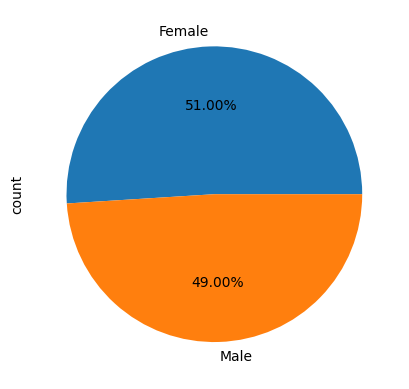

In [34]:
df['gender'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [36]:
tem_df['product_category'].value_counts()

product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



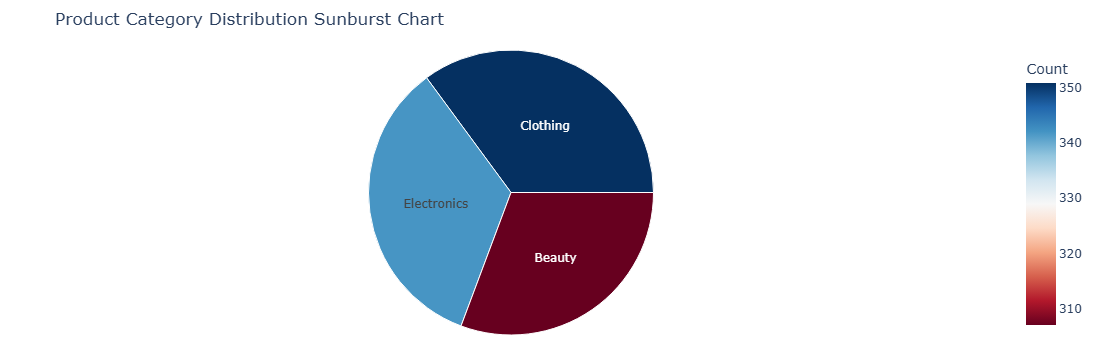

In [46]:
import plotly.express as px


fig = px.sunburst(
    category_counts,
    path=['Product Category'],  
    values='Count', 
    color='Count',  
    color_continuous_scale='RdBu',  
    title='Product Category Distribution Sunburst Chart'
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [48]:
tem_df['age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

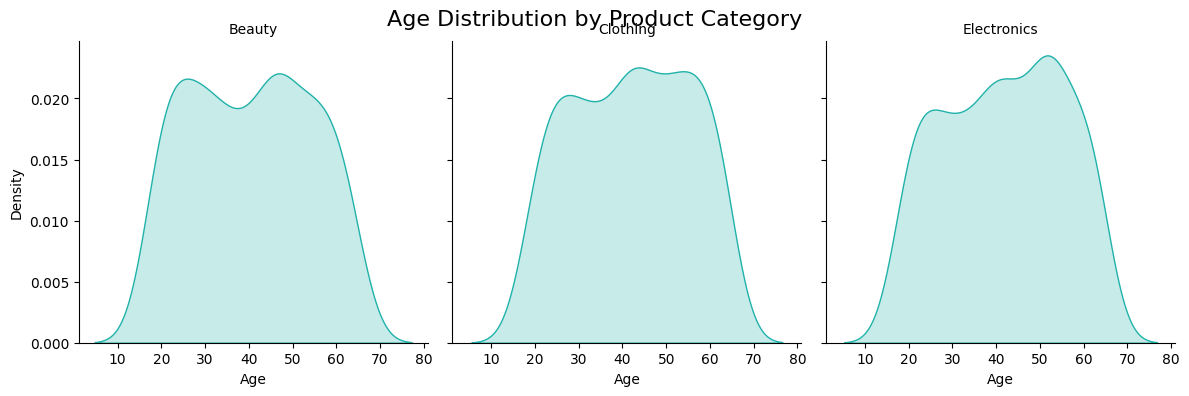

In [62]:
# Assuming `product_category` is a column in tem_df
g = sns.FacetGrid(tem_df, col='product_category', col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, 'age', fill=True, color="lightseagreen")
g.set_titles("{col_name}")
g.set_axis_labels("Age", "Density")
g.fig.suptitle('Age Distribution by Product Category', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


In [64]:
tem_df['age'].skew()

-0.04881245380328967

In [66]:
tem_df['quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

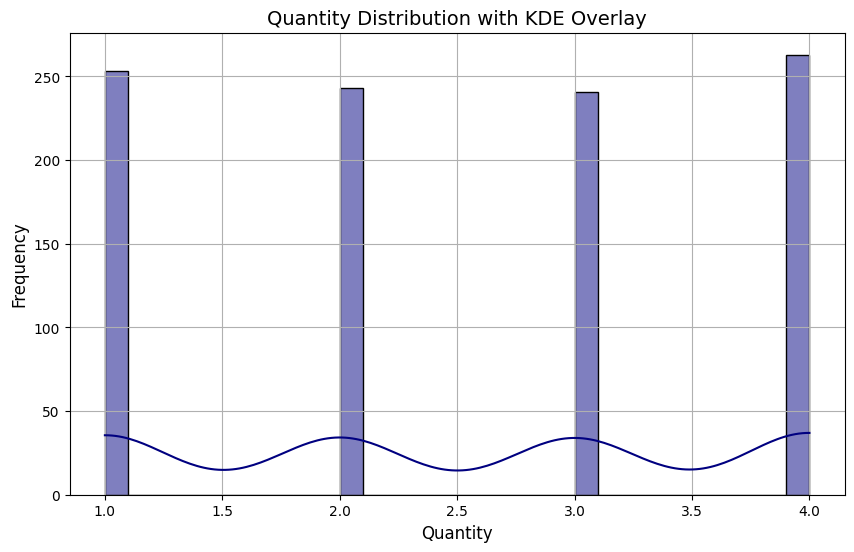

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(tem_df['quantity'], kde=True, color='navy', edgecolor='black', bins=30)
plt.title('Quantity Distribution with KDE Overlay', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [84]:
tem_df['price_per_unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price_per_unit, dtype: float64

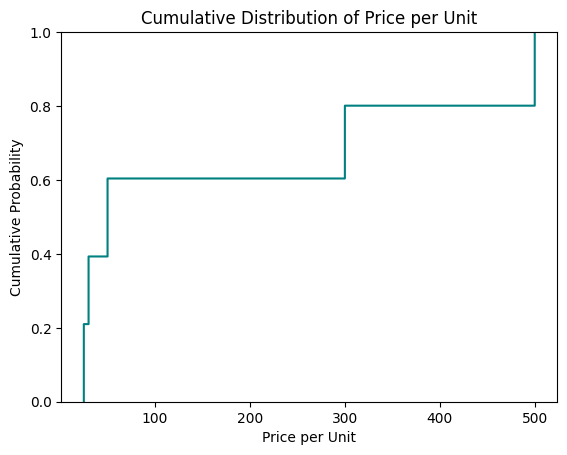

In [90]:
sns.ecdfplot(tem_df, x='price_per_unit', color='teal').set(title='Cumulative Distribution of Price per Unit', xlabel='Price per Unit', ylabel='Cumulative Probability')
plt.show()

In [92]:
tem_df['total_amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: total_amount, dtype: float64

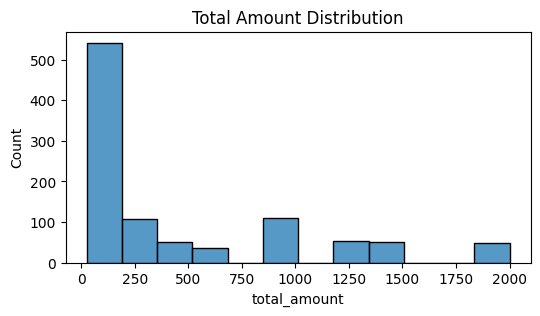

In [94]:
plt.figure(figsize=(6,3))
sns.histplot(tem_df['total_amount'])
plt.title('Total Amount Distribution')
plt.show()

<Axes: xlabel='age', ylabel='total_amount'>

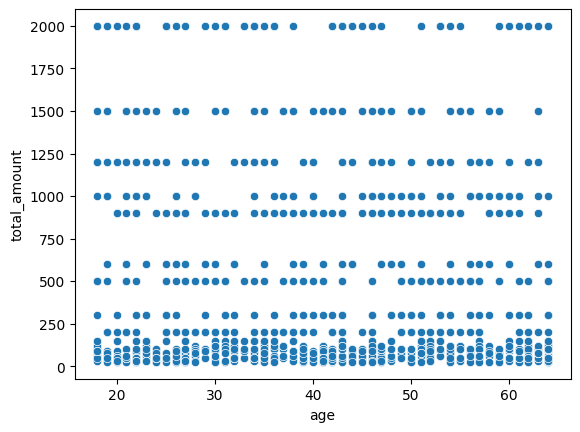

In [96]:
sns.scatterplot(tem_df, x='age', y='total_amount')

In [98]:
tem_df['age'].corr(df['total_amount'])


-0.06056802388304562

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

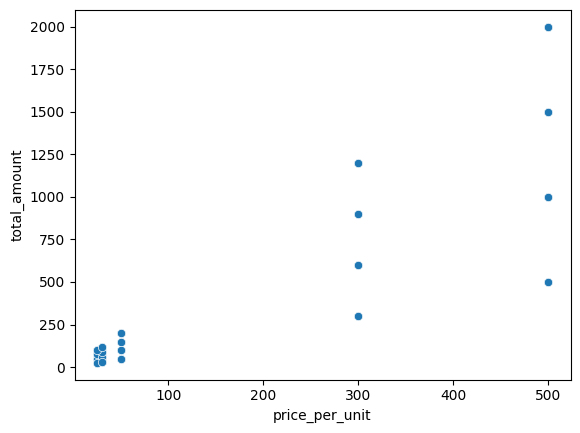

In [100]:
sns.scatterplot(tem_df, x='price_per_unit', y='total_amount')

In [102]:
tem_df['price_per_unit'].corr(df['total_amount'])

0.8519248403554038

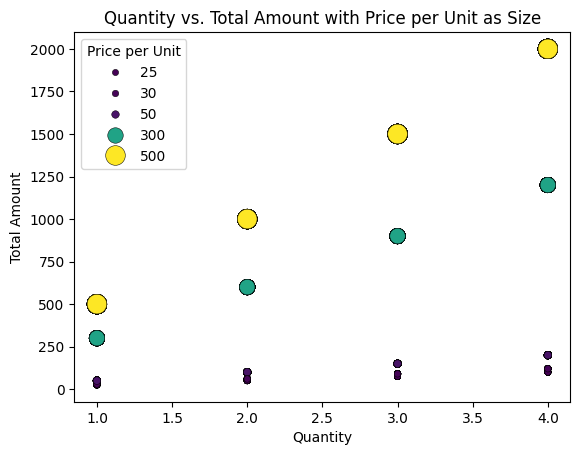

In [104]:
sns.scatterplot(data=tem_df, x='quantity', y='total_amount', size='price_per_unit', sizes=(20, 200), hue='price_per_unit', palette='viridis', edgecolor='black')
plt.title('Quantity vs. Total Amount with Price per Unit as Size')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.legend(title='Price per Unit')
plt.show()


In [106]:
tem_df['quantity'].corr(df['total_amount'])

0.3737070541214054

In [108]:
pd.crosstab(df['gender'], df['product_category'])

product_category,Beauty,Clothing,Electronics
gender,,,
Female,166,174,170
Male,141,177,172


In [110]:
pd.crosstab(df['gender'], df['quantity'])

quantity,1,2,3,4
gender,,,,
Female,125,120,127,138
Male,128,123,114,125


In [112]:
pd.crosstab(df['product_category'], df['quantity'])

quantity,1,2,3,4
product_category,,,,
Beauty,74,75,85,73
Clothing,88,80,86,97
Electronics,91,88,70,93


In [114]:
pd.crosstab(df['gender'], df['price_per_unit'])

price_per_unit,25,30,50,300,500
gender,,,,,
Female,115,92,98,106,99
Male,95,91,113,91,100


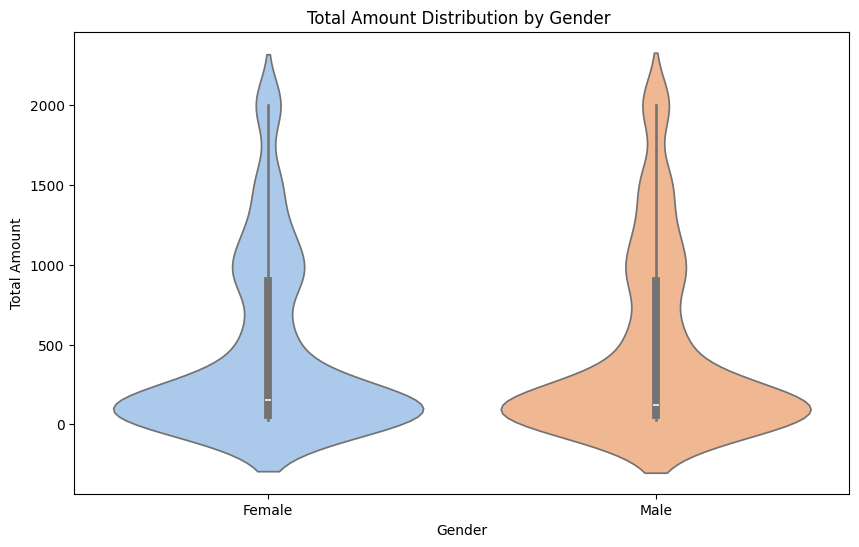

In [118]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=tem_df, x='gender', y='total_amount', palette='pastel')
plt.title('Total Amount Distribution by Gender ')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

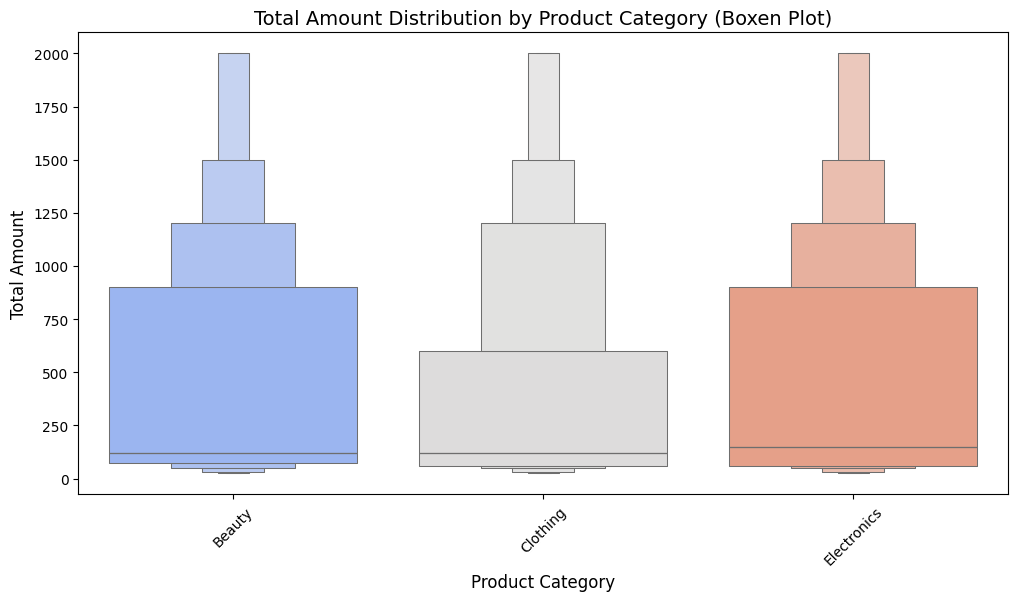

In [120]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=tem_df, x='product_category', y='total_amount', palette='coolwarm')
plt.title('Total Amount Distribution by Product Category (Boxen Plot)', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='price_per_unit', ylabel='total_amount'>

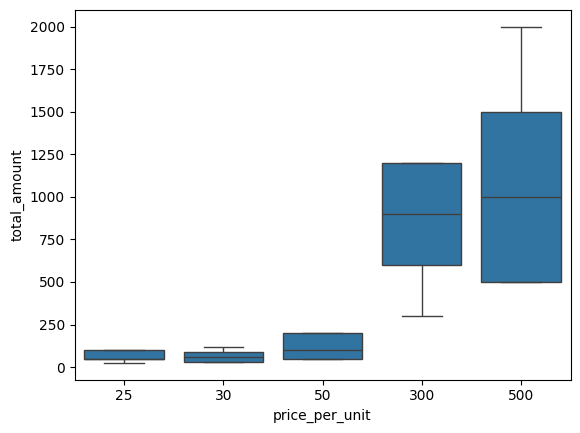

In [122]:
sns.boxplot(tem_df, x='price_per_unit', y='total_amount')

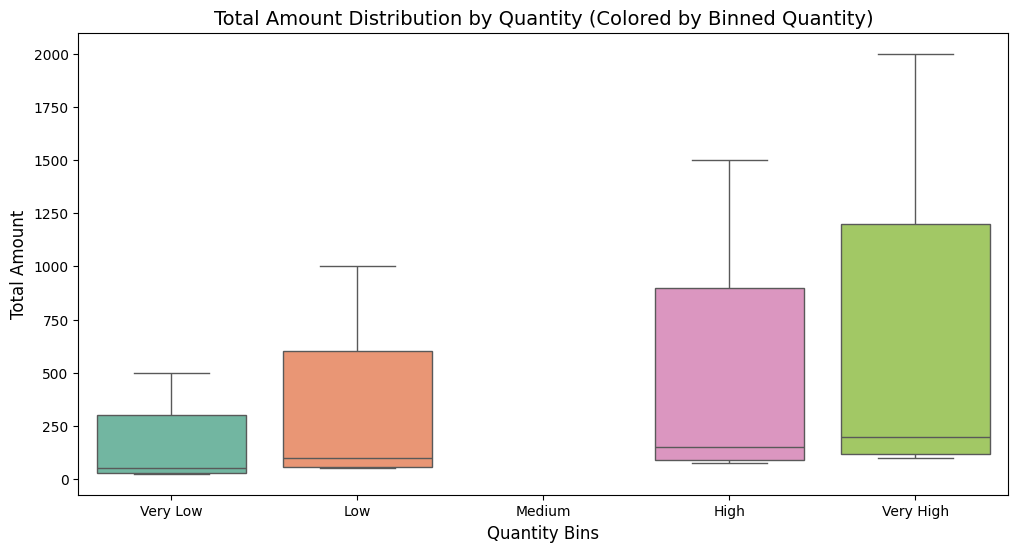

In [126]:
tem_df['quantity_bins'] = pd.cut(tem_df['quantity'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Plotting the boxplot with different colors for each 'quantity_bins' group
plt.figure(figsize=(12, 6))
sns.boxplot(data=tem_df, x='quantity_bins', y='total_amount', palette='Set2')
plt.title('Total Amount Distribution by Quantity (Colored by Binned Quantity)', fontsize=14)
plt.xlabel('Quantity Bins', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.show()

<Axes: xlabel='product_category', ylabel='total_amount'>

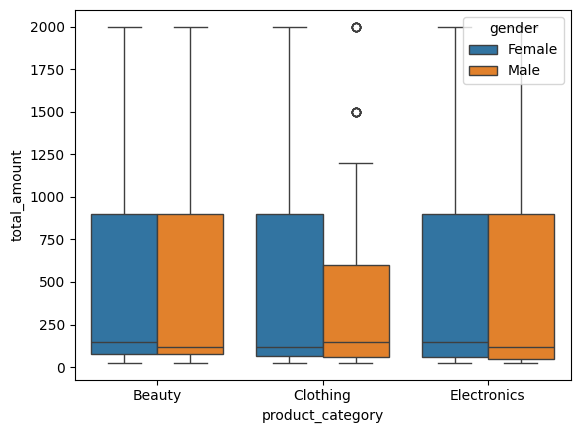

In [128]:
sns.boxplot(tem_df, x='product_category', y='total_amount', hue='gender')

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

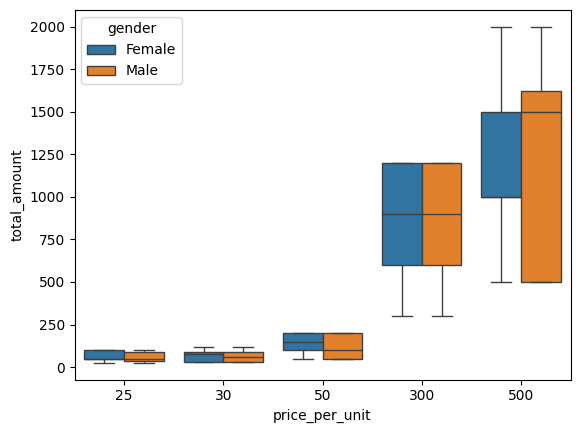

In [130]:
sns.boxplot(tem_df, x='price_per_unit', y='total_amount', hue='gender')

In [132]:
tem_df.groupby(['price_per_unit','gender'])['total_amount'].describe()

count         mean         std    min     25%     50%  \
price_per_unit gender                                                          
25             Female  115.0    63.043478   28.165361   25.0    50.0    50.0   
               Male     95.0    61.052632   28.179655   25.0    37.5    50.0   
30             Female   92.0    74.347826   33.718432   30.0    30.0    75.0   
               Male     91.0    71.538462   34.283883   30.0    30.0    60.0   
50             Female   98.0   131.122449   58.992969   50.0   100.0   150.0   
               Male    113.0   122.566372   57.473266   50.0    50.0   100.0   
300            Female  106.0   786.792453  340.049148  300.0   600.0   900.0   
               Male     91.0   791.208791  333.216097  300.0   600.0   900.0   
500            Female   99.0  1237.373737  554.864547  500.0  1000.0  1000.0   
               Male    100.0  1250.000000  570.751764  500.0   500.0  1500.0   

                          75%     max  
price_per_unit gender                  
25             Female   100.0   100.0  
               Male      87.5   100.0  
30             Female    90.0   120.0  
               Male      90.0   120.0  
50             Female   200.0   200.0  
               Male     200.0   200.0  
300            Female  1200.0  1200.0  
               Male    1200.0  1200.0  
500            Female  1500.0  2000.0  
               Male    1625.0  2000.0

In [138]:
print(tem_df.columns)

Index(['date', 'customer_id', 'gender', 'age', 'product_category', 'quantity',
       'price_per_unit', 'total_amount', 'quantity_bins'],
      dtype='object')


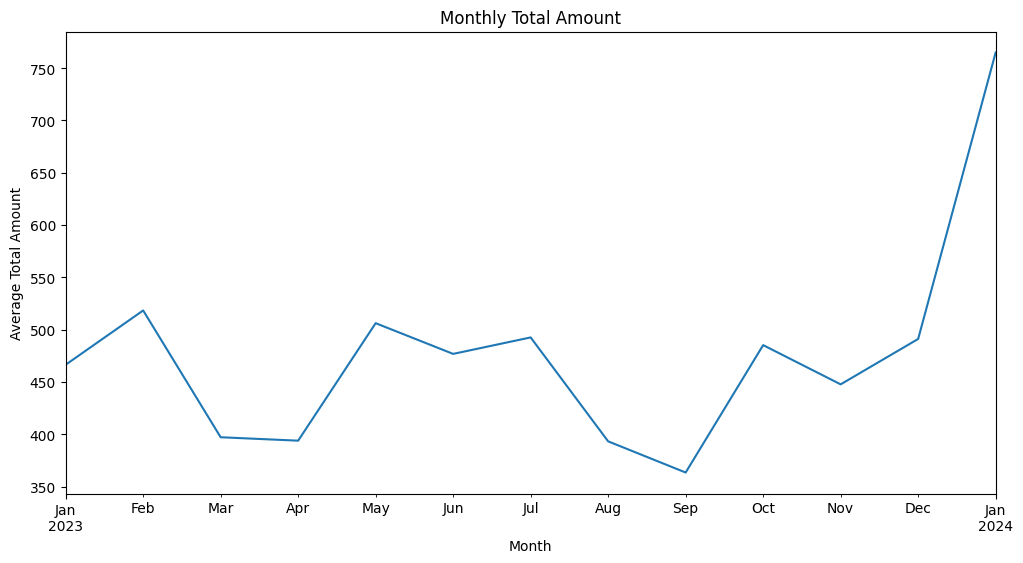

In [140]:

tem_df['date'] = pd.to_datetime(tem_df['date'])


tem_df.set_index('date', inplace=True)


monthly_window = tem_df['total_amount'].resample('M').mean()


monthly_window.plot(figsize=(12, 6))
plt.title('Monthly Total Amount')
plt.xlabel('Month')
plt.ylabel('Average Total Amount')
plt.show()

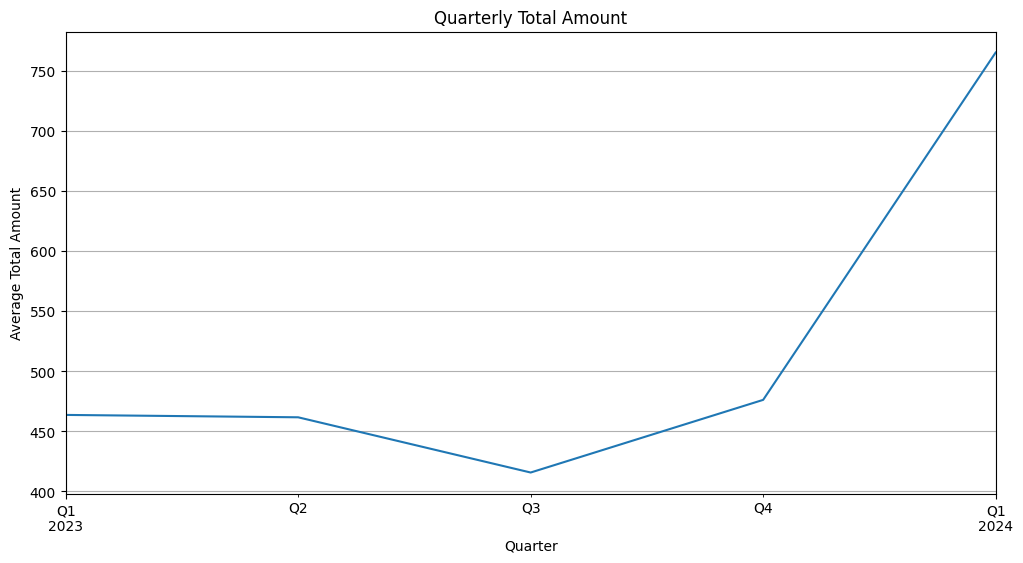

In [142]:
quarterly_window = tem_df['total_amount'].resample('Q').mean()

quarterly_window.plot(figsize=(12, 6))
plt.title('Quarterly Total Amount')
plt.xlabel('Quarter')
plt.ylabel('Average Total Amount')
plt.grid(True)
plt.show()
